## Albina Jetybayeva. DSE511. Project 1.

# Task 1. Analyze Israel COVID-19 situation

The motivation for this first part of COVID-19 data analysis was to understand the specific case of Israel country. The effect of how they tackled the pandemic with vaccinations and what impacted the further trends of confirmed cases and deaths in this country will be studied.

In [53]:
#First load the necessary packages:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib.ticker import MaxNLocator

In [54]:
#Extract data from the file:
data = pd.read_csv('time_series_covid19_confirmed_global.csv')
print(data)
data.head()

    Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
274            NaN             Vietnam  14.058324  108.277199        0   
275            NaN  West Bank and Gaza  31.952200   35.233200        0   
276            NaN               Yemen  15.552727   48.516388        0   
277            NaN              Zambia -13.133897   27.849332        0   
278            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/29/21  8/30/21  \
0          0        0        0      

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,152960,153148,153220,153260,153306,153375,153375,153375,153534,153626
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,144847,145333,146387,147369,148222,149117,150101,150997,151499,152239
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,195162,195574,196080,196527,196915,197308,197659,198004,198313,198645
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15025,15032,15033,15046,15052,15055,15055,15055,15069,15070
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,47168,47331,47544,47781,48004,48261,48475,48656,48790,49114


In [55]:
#Remove unneccessary infromation such as Longtidue and Lattitude
data.drop(['Lat','Long', 'Province/State'],axis=1, inplace=True)
data.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,152960,153148,153220,153260,153306,153375,153375,153375,153534,153626
1,Albania,0,0,0,0,0,0,0,0,0,...,144847,145333,146387,147369,148222,149117,150101,150997,151499,152239
2,Algeria,0,0,0,0,0,0,0,0,0,...,195162,195574,196080,196527,196915,197308,197659,198004,198313,198645
3,Andorra,0,0,0,0,0,0,0,0,0,...,15025,15032,15033,15046,15052,15055,15055,15055,15069,15070
4,Angola,0,0,0,0,0,0,0,0,0,...,47168,47331,47544,47781,48004,48261,48475,48656,48790,49114


In [56]:
#Extract the data for Israel
data.set_index("Country/Region", inplace = True)
result = data.loc["Israel"]
print(result)

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
9/3/21     1104971
9/4/21     1112964
9/5/21     1117596
9/6/21     1117596
9/7/21     1117596
Name: Israel, Length: 595, dtype: int64


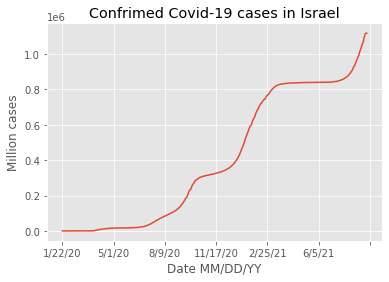

In [57]:
#Plot the confirmed cases for Israel and observe features:

mpl.style.use(['ggplot']) #use ggplot style

result.plot(kind='line')

plt.title('Confrimed Covid-19 cases in Israel')
plt.xlabel('Date MM/DD/YY')
plt.ylabel('Million cases')

plt.show()

## First observation:

* After the strict lockdown in Spring 2020, the rules were eased by the end of May. 
* Thus, in summer the cases have started to grow up again and by the end of Summer 2020, Israel became the country with the highest rate of COVID-19 infections per capita. 
* New strict lockdown started in September, most of the activities were restricted and later the exit strategy was implemented in late October.

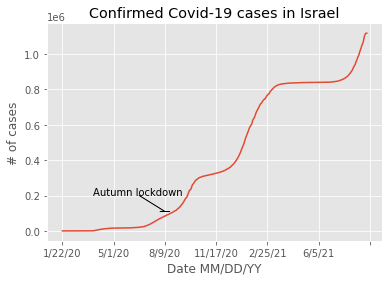

In [58]:
#Plot the confirmed cases for Israel and observe features:

mpl.style.use(['ggplot']) #use ggplot style

result.plot(kind='line')

plt.title('Confirmed Covid-19 cases in Israel')
plt.xlabel('Date MM/DD/YY')
plt.ylabel('# of cases')

#Annotate the trend change on the graph from the first observation

plt.text(60, 200000, 'Autumn lockdown')
plt.arrow(150, 200000, 50, -90000, width = 1.5, ec='black', head_width = 20)

plt.show()

## Second observation:

* On December 2020, multiple countries announced the appearance of new and more infectious COVID-19 strains.
* Alpha and beta strain were detected in January in Israel and cases started to rise again.
* However, in early December Israel has started the wide vaccination.

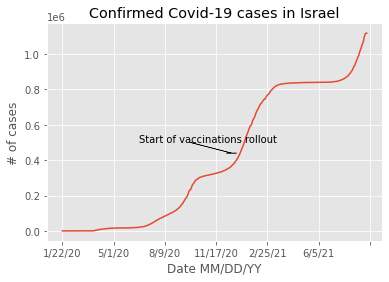

In [59]:
#Plot the confirmed cases for Israel and observe features:

mpl.style.use(['ggplot']) #use ggplot style

result.plot(kind='line')

plt.title('Confirmed Covid-19 cases in Israel')
plt.xlabel('Date MM/DD/YY')
plt.ylabel('# of cases')

#Annotate the trend change on the graph from the first observation

plt.text(150, 500000, 'Start of vaccinations rollout')
plt.arrow(250, 500000, 80, -60000, width = 1.5, ec='black', head_width = 20)

plt.show()

## Third observation

* So following the national vaccination campaign from late December to April 2021, Israel reached a vaccination rate of over 50% of the population, and 9% recovered from COVID-19, with resulting drops in new cases and deaths.
* So the new cases dropped and the covid situation was stabilized in the country.

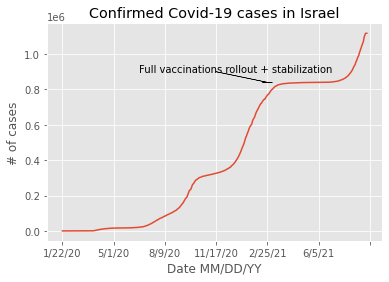

In [60]:
#Plot the confirmed cases for Israel and observe features:

mpl.style.use(['ggplot']) #use ggplot style

result.plot(kind='line')

plt.title('Confirmed Covid-19 cases in Israel')
plt.xlabel('Date MM/DD/YY')
plt.ylabel('# of cases')

#Annotate the trend change on the graph from the first observation

plt.text(150, 900000, 'Full vaccinations rollout + stabilization')
plt.arrow(300, 900000, 100, -60000, width = 1.5, ec='black', head_width = 20)

plt.show()

## Fourth observation

* By the time when Delta strain was first detected, approximately 60% of the Israel population was vaccinated.
* The first case of Delta variant was detected in April 2021.
* Starting from June the cases started rising rapidly again.
* On 8 August 2021, restrictions renewed by the government came into effect to slow the spread of the Delta variant.

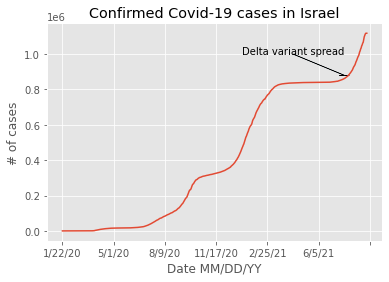

In [61]:
#Plot the confirmed cases for Israel and observe features:

mpl.style.use(['ggplot']) #use ggplot style

result.plot(kind='line')

plt.title('Confirmed Covid-19 cases in Israel')
plt.xlabel('Date MM/DD/YY')
plt.ylabel('# of cases')

#Annotate the trend change on the graph from the first observation

plt.text(350, 1000000, 'Delta variant spread')
plt.arrow(450, 1000000, 100, -120000, width = 1.5, ec='black', head_width = 20)

plt.show()

## Analyze death trends

To observe how the same events affected the death trends, the analysis has been also done on the death data.

In [62]:
#Extract data from the file:
data_death = pd.read_csv('time_series_covid19_deaths_global.csv')
print(data_death)
data_death.head()

    Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
274            NaN             Vietnam  14.058324  108.277199        0   
275            NaN  West Bank and Gaza  31.952200   35.233200        0   
276            NaN               Yemen  15.552727   48.516388        0   
277            NaN              Zambia -13.133897   27.849332        0   
278            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/29/21  8/30/21  \
0          0        0        0      

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7101,7116,7118,7123,7127,7127,7127,7127,7141,7144
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2492,2495,2498,2501,2505,2508,2512,2515,2519,2523
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5209,5240,5269,5302,5339,5373,5399,5420,5445,5471
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1201,1210,1217,1227,1235,1248,1258,1270,1282,1299


In [63]:
#Remove unneccessary infromation such as Longtidue and Lattitude

data_death.drop(['Lat','Long', 'Province/State'],axis=1, inplace=True)
data_death.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7101,7116,7118,7123,7127,7127,7127,7127,7141,7144
1,Albania,0,0,0,0,0,0,0,0,0,...,2492,2495,2498,2501,2505,2508,2512,2515,2519,2523
2,Algeria,0,0,0,0,0,0,0,0,0,...,5209,5240,5269,5302,5339,5373,5399,5420,5445,5471
3,Andorra,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,Angola,0,0,0,0,0,0,0,0,0,...,1201,1210,1217,1227,1235,1248,1258,1270,1282,1299


In [64]:
#Extract the data for Israel

data_death.set_index("Country/Region", inplace = True)
result_death = data_death.loc["Israel"]
print(result_death)

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
9/3/21     7129
9/4/21     7154
9/5/21     7205
9/6/21     7205
9/7/21     7205
Name: Israel, Length: 595, dtype: int64


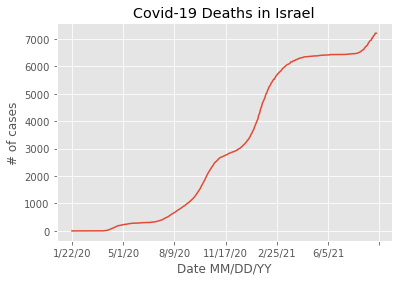

In [65]:
#Plot the confirmed cases for Israel and observe features:

mpl.style.use(['ggplot']) #use ggplot style

result_death.plot(kind='line')

plt.title('Covid-19 Deaths in Israel')
plt.xlabel('Date MM/DD/YY')
plt.ylabel('# of cases')

plt.show()

## General observation

The trend of deaths looks similar to confrimed cases, so to compare them, both are plotted in one graph below.

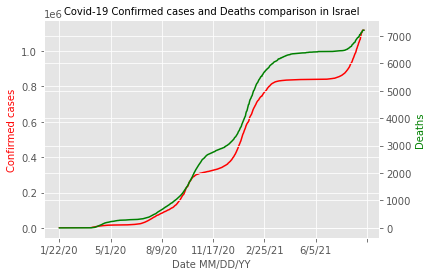

In [66]:
#Use ax to create two different y-axis, since confirmed cases and deaths have different scales:

fig, ax = plt.subplots()
plt.title('Covid-19 Confirmed cases and Deaths comparison in Israel', fontsize=10)

ax.plot(result, color='red')
ax.set_xlabel("Date MM/DD/YY",fontsize=10)
ax.xaxis.set_major_locator(MaxNLocator(7)) 
ax.set_ylabel("Confirmed cases",color="red",fontsize=10)

ax2 = ax.twinx()

ax2.plot(result_death, color='green')
ax2.set_ylabel("Deaths",color="green",fontsize=10)
ax2.xaxis.set_major_locator(MaxNLocator(7)) 

plt.show()

In [67]:
#To check the direct numerical correlation Pearson can be used:

corr, _ = pearsonr(result, result_death)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.997


## Summary

* The analysis was done on Israel specific case.
* The effect of slowing down the virus spread was observed with the strict lockdown rules implementation.
* Similarly the great decrease of covid cases was observed with the high vaccination spread.
* However, the strains such as Delta, which are more contagious and causing more severe illness still affect even highly vaccinated nations.
* Cases number and deaths trends are very closely correlated.

## References

https://www.npr.org/sections/goatsandsoda/2021/08/20/1029628471/highly-vaccinated-israel-is-seeing-a-dramatic-surge-in-new-covid-cases-heres-why

https://journals.sagepub.com/doi/full/10.1177/23333928211005867

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Israel